## Trying NetworkX to dran simple "node" diagrams

Note
- "node" is a point 
- "edge" is a line between nodes

Example here
https://ipython-books.github.io/64-visualizing-a-networkx-graph-in-the-notebook-with-d3js/      
and       
https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

Info about layout/formatting
https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout



In [1]:
import networkx as nx
# matplotlib can be used with networkx to help with layout/formatting
import matplotlib.pyplot as plt

### Example from 
https://deparkes.co.uk/2018/04/02/python-simple-networkx-example/

In [2]:
my_graph = nx.Graph()
my_graph.add_edges_from([
                        (1,2), 
                        (1,3), 
                        (3,4), 
                        (1,5), 
                        (3,5),
                        (4,2),
                        (2,3),
                        (3,0)])

#### Draw graph - believe depends on matplotlib behind the scenes

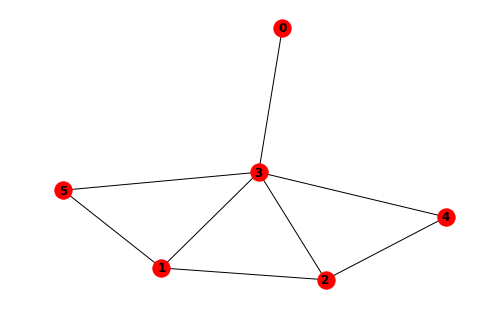

In [3]:
nx.draw(my_graph, with_labels=True, font_weight='bold')

### Own go
Uses **DiGraph** which has directional edges (lines)    
- DiGraph Edges have arrows by default
- Can convert back to plain graph using `to_undirected()` method. (corresponding `to_directed()` method converts graph to digraph)
- Cannot use `nx.connected_component_subgraphs` with digraphs but can convert back to ordinary graph first.

In [4]:
my_graph = nx.DiGraph()
# Nodes
my_graph.add_node("One")
my_graph.add_node("Two")
my_graph.add_node("Three")
# Edges (lines)
my_graph.add_edge("One", "Two")
my_graph.add_edge("One", "Three")

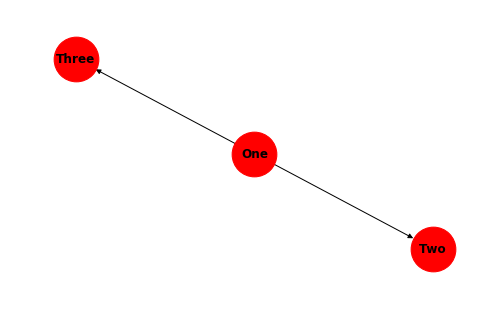

In [5]:
nx.draw(my_graph, with_labels=True, font_weight='bold', node_size = 2000)

## Another go
#### With shortcut - nodes are automatically created when edge added, so no need to create nodes first


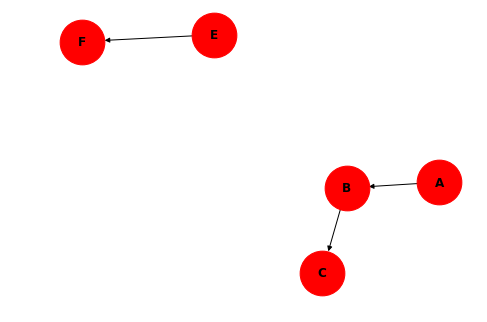

In [7]:
quick_graph = nx.DiGraph()
quick_graph.add_edge("A", "B")
quick_graph.add_edge("B", "C")
quick_graph.add_edge("E", "F")
nx.draw(quick_graph, with_labels=True, font_weight='bold', node_size = 2000)

### Setup another, slightly more complicated, arrangement and display in simple way
This one has two groups of nodes, aka subgraphs

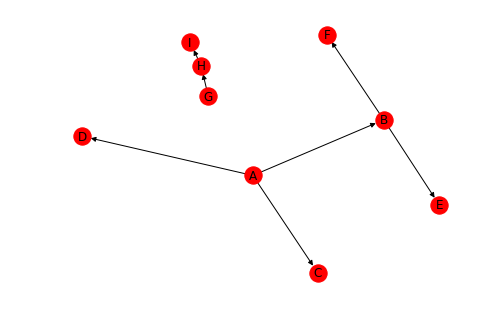

In [8]:
values = [("A", "B"), ("A", "C"), ("A", "D")]
values.extend([("B","E"), ("B", "F")] + [("G", "H"), ("H", "I")])

thing = nx.DiGraph()
for val in values:
    thing.add_edge(*val) 
nx.draw(thing, with_labels=True)

### Tracking what's in what
Some ways of examining how things are connected

In [36]:
for i in thing.adjacency():
    print i

('A', {'C': {}, 'B': {}, 'D': {}})
('C', {})
('B', {'E': {}, 'F': {}})
('E', {})
('D', {})
('G', {'H': {}})
('F', {})
('I', {})
('H', {'I': {}})


In [19]:
thing.degree

DiDegreeView({'A': 3, 'C': 1, 'B': 3, 'E': 1, 'D': 1, 'G': 1, 'F': 1, 'I': 1, 'H': 2})

In [38]:
thing.adj

AdjacencyView({'A': {'C': {}, 'B': {}, 'D': {}}, 'C': {}, 'B': {'E': {}, 'F': {}}, 'E': {}, 'D': {}, 'G': {'H': {}}, 'F': {}, 'I': {}, 'H': {'I': {}}})

In [42]:
x = thing.neighbors("A")

In [44]:
for i in x:
    print i

C
B
D


## Getting Subgraphs
- Can use `nx.connected_component_subgraphs()` to get subgraphs
- Doesn't work on directed graphs but can convert to undirected first using `to_undirected()` method, as below.

In [27]:
subgraphs = list(nx.connected_component_subgraphs(thing.to_undirected()))

**First subgraph**

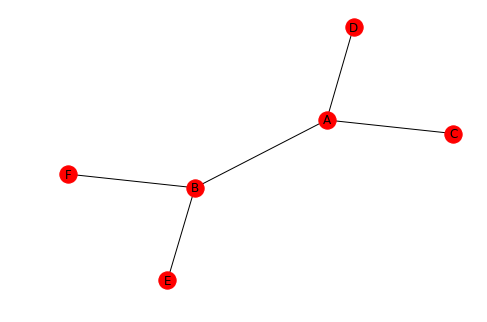

In [28]:
nx.draw(subgraphs[0], with_labels=True)

**Second Subgraph**

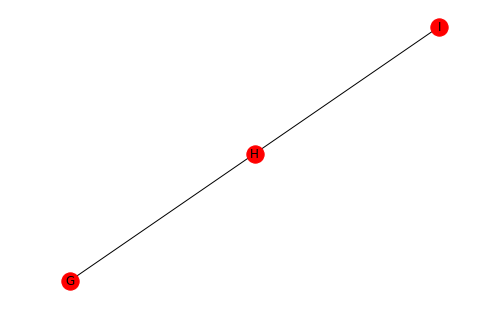

In [29]:
nx.draw(subgraphs[1], with_labels=True)

### Formatting/Layout

- networkx uses matplotlib (automatically behend the scenes) to display graphs.
- also possible to directly use matplotlib settings to affect the way things are displayed, e.g. can control size of displayed image using `plt.figure(figsize=(10,5))` and `plt.show()`

Clues here? https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_house_with_colors.html#sphx-glr-auto-examples-drawing-plot-house-with-colors-py     
or here https://stackoverflow.com/questions/27030473/how-to-set-colors-for-nodes-in-networkx-python    
from manual https://networkx.github.io/documentation/stable/reference/drawing.html

**node_shape** - "o" (circle, default), "s" (square), "d" - (diamond). Based on matplotlib markers https://matplotlib.org/api/markers_api.html#module-matplotlib.markers     
**node_color** (colour string, or array of floats) – Node colour. Can be a single colour format string (default=’#1f78b4’, "r", "g", "b", "olive)), or a sequence of colors with the same length as nodelist. If numeric values are specified they will be mapped to colours using the cmap and vmin,vmax parameters. See matplotlib.scatter for more details.

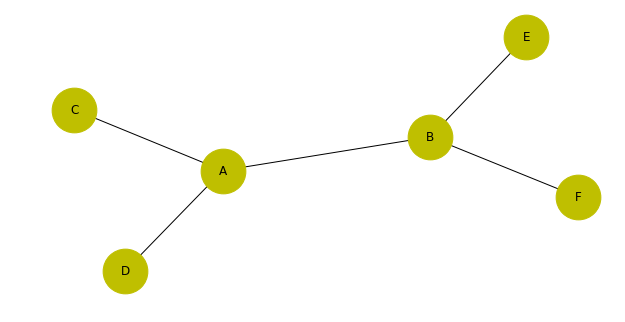

In [43]:
plt.figure(figsize=(8,4))
nx.draw(subgraphs[0], with_labels=True, node_color='y', node_size=2000, node_shape='o')
plt.show()

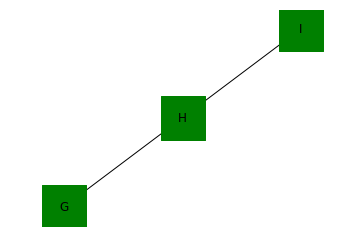

In [39]:
plt.figure(figsize=(4,3))
nx.draw(subgraphs[1], with_labels=True, node_color='g', node_size=2000, node_shape='s')
plt.show()

### Can specify individual colour for each node by supplying list of colour values
But not multiple node shapes

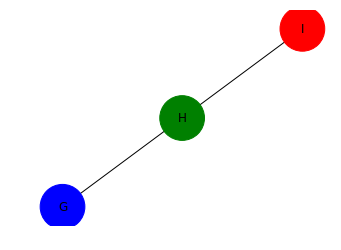

In [48]:
plt.figure(figsize=(4,3))
nx.draw(subgraphs[1], with_labels=True, node_color=['r', 'g', 'b'], node_size=2000, node_shape = 'o')
plt.show()

### Can use nodelist to draw just particular nodes
Enables different format settings for each group    
***Messy - get different positioning for each one***

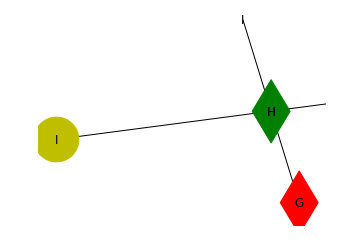

In [56]:
plt.figure(figsize=(4,3))
nx.draw(subgraphs[1], with_labels=True, node_color=['r', 'g', 'b'], node_size=2000, node_shape = 'd', nodelist=["G", "H"])
nx.draw(subgraphs[1], with_labels=True, node_color="y", node_size=2000, node_shape = 'o', nodelist=["I"])
plt.show()

#### Can fix this layout problem by setting pos (position) values first then supplying them to each nx.draw call

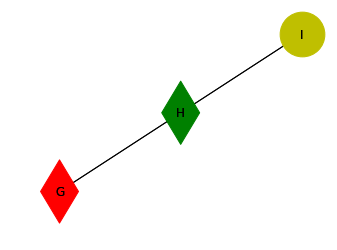

In [57]:
pos = nx.spring_layout(subgraphs[1])
plt.figure(figsize=(4,3))
nx.draw(subgraphs[1], pos, with_labels=True, node_color=['r', 'g', 'b'], node_size=2000, node_shape = 'd', nodelist=["G", "H"])
nx.draw(subgraphs[1], pos, with_labels=True, node_color="y", node_size=2000, node_shape = 'o', nodelist=["I"])
plt.show()

### Labels
Can assign descriptive label to each node by defining in dictionary
Note node size does not automatically adjust - need to set size, so big enough for label to fit

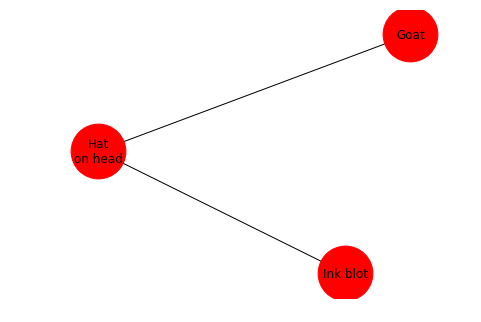

In [71]:
my_labels = {"G": "Goat", "H": "Hat\non head", "I": "Ink blot"}
nx.draw(subgraphs[1], with_labels=True, labels = my_labels, node_size=3000)